Классификация с помощью kNN. Кластеризация K-means¶

Задание 1: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

Задание 2: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

Задание 3: Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

Задание 4: (опция) Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from sklearn import model_selection
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.2,
                                                                    random_state=1)

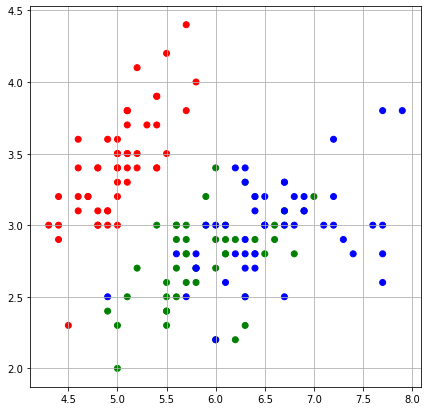

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.grid()

In [5]:
#-------------------------ФУНКЦИИ---------------------------#

#-----------------------Функция №1-------------------------#
#Используем евклидову метрику. Реализуем функцию для ее подсчета.
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

#-----------------------Функция №2-------------------------#
#алгоритм поиска k ближайших соседей.
def knn(x_train, y_train, x_test, k, w = None):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        if w == None:
            for d in sorted(test_distances)[0:k]:
                weight = 1/d[0]
                classes[d[1]] += weight
        else:
            for d in sorted(test_distances)[0:k]:
                weight = w*d[0]
                classes[d[1]] += weight
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key = classes.get)[-1])
    return answers

#-----------------------Функция №3-------------------------#
#Напишем функцию для вычисления точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

#-----------------------Функция №4-------------------------#
#график распределения классов
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.grid()
    plt.show()

#-------------------------ФУНКЦИИ---------------------------#

Построение моделей с весами от номера соседа

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


Точность алгоритма при k = 1: 0.667


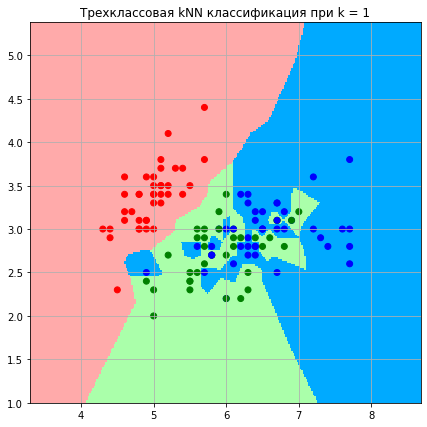

In [6]:
k = 1
y_pred = knn(X_train, y_train, X_test, k)

accuracy_neib_1 = accuracy(y_pred, y_test)
accuracy_neib_list = []
accuracy_neib_list.append(accuracy_neib_1)
print(f'Точность алгоритма при k = {k}: {accuracy_neib_1:.3f}')
get_graph(X_train, y_train, k)

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


Точность алгоритма при k = 3: 0.767


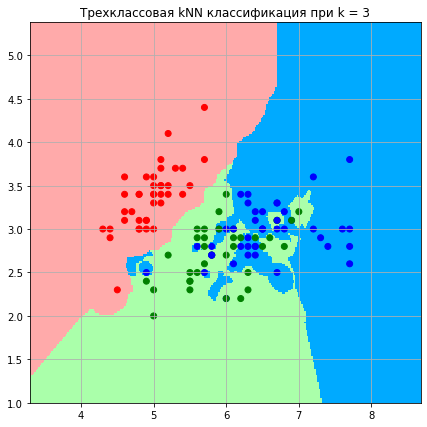

In [7]:
k = 3
y_pred = knn(X_train, y_train, X_test, k)

accuracy_neib_3 = accuracy(y_pred, y_test)
accuracy_neib_list.append(accuracy_neib_3)
print(f'Точность алгоритма при k = {k}: {accuracy_neib_3:.3f}')
get_graph(X_train, y_train, k)

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


Точность алгоритма при k = 5: 0.833


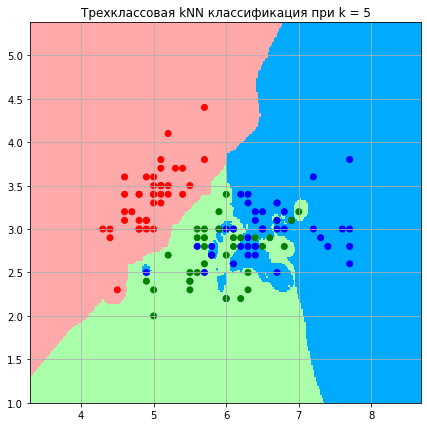

In [8]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)

accuracy_neib_5 = accuracy(y_pred, y_test)
accuracy_neib_list.append(accuracy_neib_5)
print(f'Точность алгоритма при k = {k}: {accuracy_neib_5:.3f}')
get_graph(X_train, y_train, k)

/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


Точность алгоритма при k = 10: 0.833


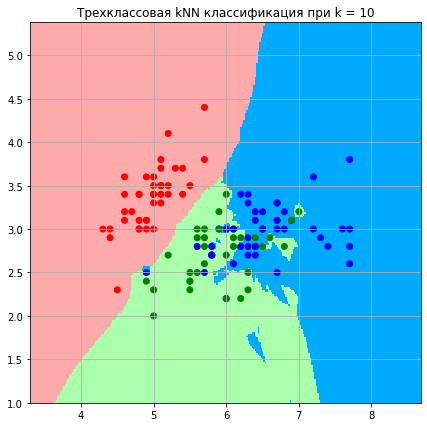

In [9]:
k = 10
y_pred = knn(X_train, y_train, X_test, k)

accuracy_neib_10 = accuracy(y_pred, y_test)
accuracy_neib_list.append(accuracy_neib_10)
print(f'Точность алгоритма при k = {k}: {accuracy_neib_10:.3f}')
get_graph(X_train, y_train, k)

Построение моделей с весами от расстояния

Точность алгоритма при k = 1: 0.467


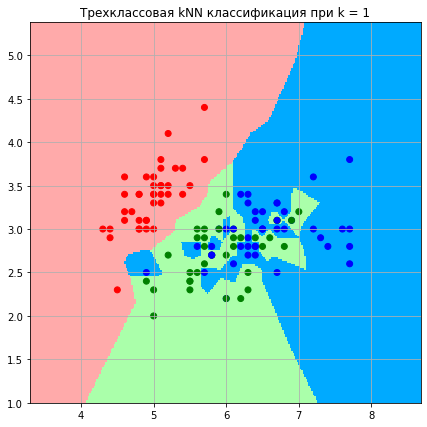

In [11]:
k = 1
y_pred = knn(X_train, y_train, X_test, k, 0.9)

accuracy_dist_1 = accuracy(y_pred, y_test)
accuracy_dist_list = []
accuracy_dist_list.append(accuracy_dist_1)
print(f'Точность алгоритма при k = {k}: {accuracy_dist_1:.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 3: 0.767


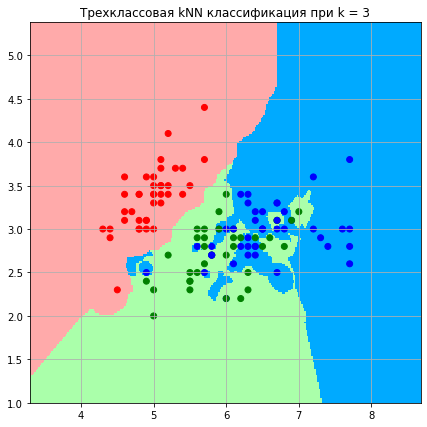

In [12]:
k = 3
y_pred = knn(X_train, y_train, X_test, k, 0.9)

accuracy_dist_3 = accuracy(y_pred, y_test)
accuracy_dist_list.append(accuracy_dist_3)
print(f'Точность алгоритма при k = {k}: {accuracy_dist_3:.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 5: 0.900


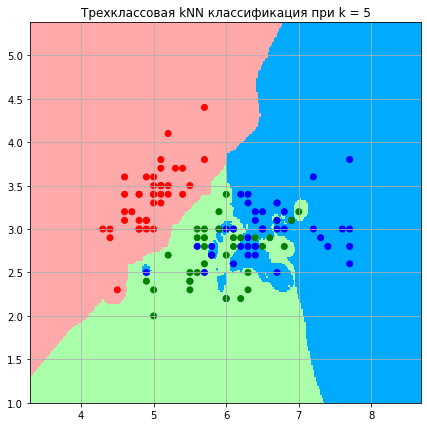

In [13]:
k = 5
y_pred = knn(X_train, y_train, X_test, k, 0.9)

accuracy_dist_5 = accuracy(y_pred, y_test)
accuracy_dist_list.append(accuracy_dist_5)
print(f'Точность алгоритма при k = {k}: {accuracy_dist_5:.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 10: 0.833


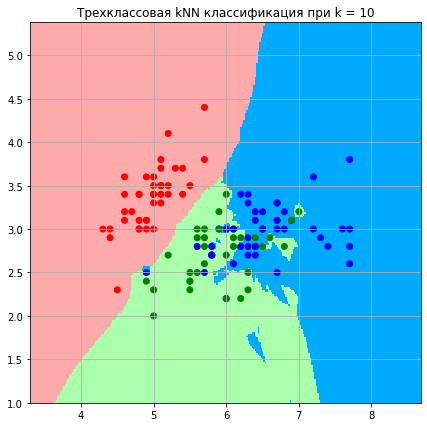

In [14]:
k = 10
y_pred = knn(X_train, y_train, X_test, k, 0.9)

accuracy_dist_10 = accuracy(y_pred, y_test)
accuracy_dist_list.append(accuracy_dist_10)
print(f'Точность алгоритма при k = {k}: {accuracy_dist_10:.3f}')
get_graph(X_train, y_train, k)

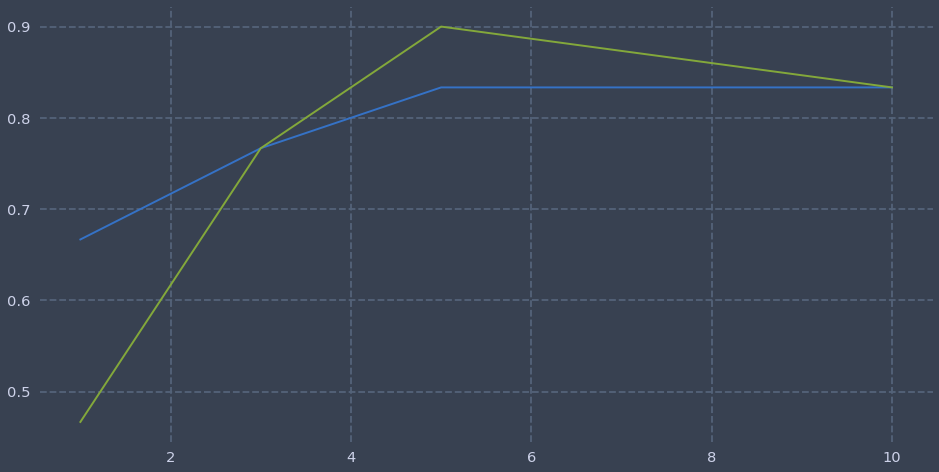

In [20]:
k_list = [1, 3, 5, 10]

plt.figure(figsize=(16,8))
plt.plot(k_list, accuracy_neib_list)
plt.plot(k_list, accuracy_dist_list)
jtplot.style(theme='onedork')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
plt.show()

Вывод: оптимальное значение К соседей - 5 для обоих случаев, 
    так как повышение К соседей ведет к переобучению (видны следы на гиперплоскости) 
    и уменьшению accuracy